## Load data and libraries

In [1]:
import pandas as pd
import os
import numpy as np 
#Plots
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl
#Maps
import geopandas as gp
import folium 
#Statistical testing
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import f_oneway



In [2]:
# Directory where my CSV files are located
directory = '/Users/alejandrovillanuevalledo/Documents/GitHub/Hong-Kong_project/CSV'

# Iterate over each file in the directory and create a dataframe for each file
for filename in os.listdir(directory):
    if filename.endswith(".csv"):  # Check if the file is a CSV file
        file_path = os.path.join(directory, filename)  # Get the full file path
        # Read the CSV file and create a DataFrame with a variable name based on the filename (without extension)
        dataframe_name = os.path.splitext(filename)[0]
        globals()[dataframe_name] = pd.read_csv(file_path)


In [3]:
#listing_2 = pd.read_csv('/Users/alejandrovillanuevalledo/Documents/GitHub/Hong-Kong_project/CSV/listings-2.csv')
#listing_2.columns

In [4]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [5]:
#Modify the dataset to keep only variables of interest
colums_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'source','picture_url','host_url', 'host_thumbnail_url', 'host_picture_url','neighbourhood', 'neighbourhood_group_cleansed', 'latitude',
'longitude','bathrooms', 'amenities','calendar_updated','calendar_last_scraped']
listings = listings.drop(columns= colums_to_drop)

In [6]:
'''
# Find columns that are unique to df1
unique_to_df1 = listings.columns.difference(listing_2.columns)

# Find columns that are unique to df2
unique_to_df2 = listing_2.columns.difference(listings.columns)

# Print columns that are not present in both DataFrames
print("Columns unique to df1:", list(unique_to_df1))
print("Columns unique to df2:", list(unique_to_df2))
'''

'\n# Find columns that are unique to df1\nunique_to_df1 = listings.columns.difference(listing_2.columns)\n\n# Find columns that are unique to df2\nunique_to_df2 = listing_2.columns.difference(listings.columns)\n\n# Print columns that are not present in both DataFrames\nprint("Columns unique to df1:", list(unique_to_df1))\nprint("Columns unique to df2:", list(unique_to_df2))\n'

## Data cleansing and pre-processing

In [15]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7029 entries, 0 to 7028
Data columns (total 56 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            7029 non-null   int64         
 1   name                                          7029 non-null   object        
 2   neighborhood_overview                         2131 non-null   object        
 3   host_id                                       7029 non-null   int64         
 4   host_name                                     7029 non-null   object        
 5   host_since                                    7029 non-null   datetime64[ns]
 6   host_location                                 4593 non-null   object        
 7   host_about                                    4472 non-null   object        
 8   host_response_time                            6302 non-null   object

In [9]:
#Check for duplicates 
listings.duplicated().sum()

0

In [10]:
#Are there any rows where all values are null?
listings.isnull().all(axis = 1).sum()

0

In [11]:
#Check for missing values
listings.isnull().sum()
#drop description, bedrooms & license(they are blank). Neighborhood overview & host to turn categorical

id                                                 0
name                                               0
description                                     7029
neighborhood_overview                           4898
host_id                                            0
host_name                                          0
host_since                                         0
host_location                                   2436
host_about                                      2557
host_response_time                               727
host_response_rate                               727
host_acceptance_rate                             551
host_is_superhost                                 16
host_neighbourhood                               443
host_listings_count                                0
host_total_listings_count                          0
host_verifications                                 0
host_has_profile_pic                               0
host_identity_verified                        

### Fix Columns

In [12]:
listings = listings.drop(columns= ['description', 'bedrooms', 'license'])

In [13]:
listings['review_scores_rating'].isnull().sum()

3487

In [14]:
#Turn date columns to datetime
columms_to_date = ['host_since', 'first_review', 'last_review']
listings[columms_to_date] = listings[columms_to_date].apply(pd.to_datetime)

In [23]:
#Turn categorical columns to categorical
columns_to_categorical = ['host_is_superhost','host_has_profile_pic','host_identity_verified','has_availability', 'instant_bookable','host_response_time','room_type' ]
listings[columns_to_categorical] = listings[columns_to_categorical].astype('category')

In [20]:
#Extract number of bathrooms from bathrooms_text column
listings['bathrooms'] = listings['bathrooms_text'].str.extract(r'(\d+(?:\.\d+)?)')
def update_bathrooms(row):
    if pd.isna(row['bathrooms_text']):
        return row['bathrooms']
    elif 'half' in row['bathrooms_text'].lower():
        return 0.5
    else:
        return row['bathrooms']

# Apply custom function to update bathrooms
listings['bathrooms'] = listings.apply(update_bathrooms, axis=1)
del listings['bathrooms_text']

In [23]:
listings['price'] = listings['price'].str.replace('$','').str.replace(',','')
columns_to_int = ['price','bathrooms']
listings[columns_to_int] = listings[columns_to_int].astype('float')

/var/folders/y5/yrmbbwsx3sg3l8fv0bd8kxm80000gn/T/ipykernel_74577/101578773.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings['price'] = listings['price'].str.replace('$','').str.replace(',','')


In [24]:
print(listings['host_response_time'].unique())
print(listings['room_type'].unique())

[NaN, 'within an hour', 'a few days or more', 'within a few hours', 'within a day']
Categories (4, object): ['a few days or more', 'within a day', 'within a few hours', 'within an hour']
['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']
Categories (4, object): ['Entire home/apt', 'Hotel room', 'Private room', 'Shared room']


In [25]:
percentage_columns = ['host_response_rate', 'host_acceptance_rate']
listings[percentage_columns] = listings[percentage_columns].replace('%', '', regex=True).astype('float')/100

In [26]:
listings.rename(columns={'neighbourhood_cleansed': 'neighbourhood'}, inplace=True)

### Price Outliers 

<Axes: xlabel='price', ylabel='Count'>

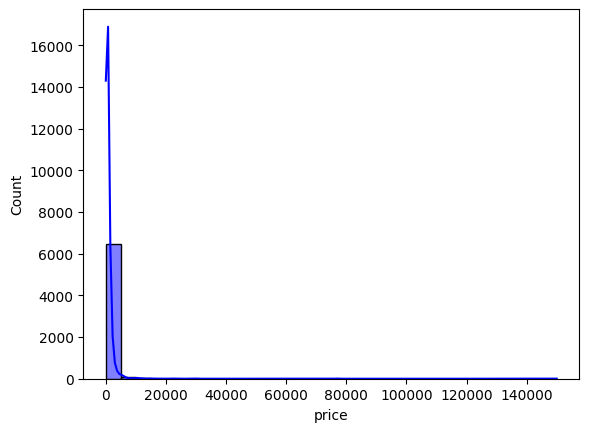

In [27]:
print(sns.histplot(listings['price'], kde=True, color='blue', bins=30))
print(sns.boxplot(x=listings['price']))

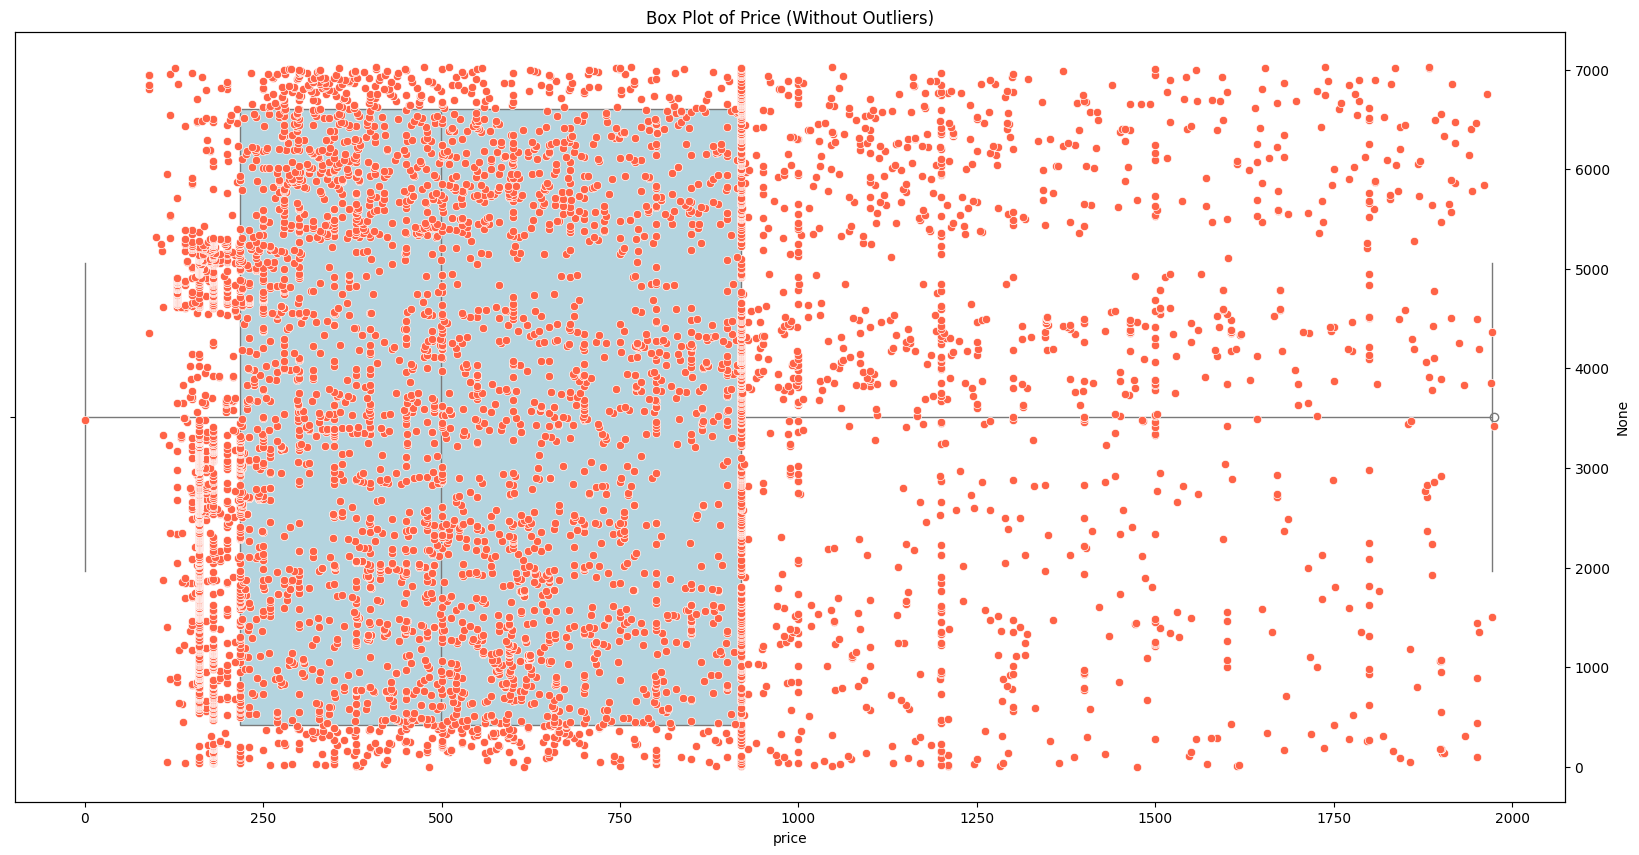

In [29]:
# Calculate quartiles
Q1 = listings['price'].quantile(0.25)
Q3 = listings['price'].quantile(0.75)

# Calculate interquartile range (IQR)
IQR = Q3 - Q1

# Define upper bound
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with values within the top quartile
listings['price'] = listings['price'].apply(lambda x: Q3 if x > upper_bound else x)

# Plot box-plot of the updated "price" variable
plt.figure(figsize=(20, 10))
sns.boxplot(x=listings['price'], color='lightblue')
scatter_ax = plt.gca().twinx()  # Create a new set of y-axes sharing the same x-axis
sns.scatterplot(x=listings['price'], y=listings.index, color='tomato', ax=scatter_ax)
plt.title('Box Plot of Price (Without Outliers)')
plt.xlabel('Price')
plt.show()


## Exploratory Data Analysis

In [ ]:
#Airbnb colour palettes for the following plots
sns.blend_palette(['pink', 'coral','tomato','red'], 15)
airbnb_palette = sns.blend_palette(['pink', 'coral','tomato','red'], 15)
airbnb_light = sns.light_palette("tomato",'coral', as_cmap=True)

### Continuous variables

In [17]:
#Correlation Matrix - this is just for me 
num_columns = listings.select_dtypes(include=['number'])
num_columns.corr('spearman')
plt.figure(figsize=(20, 18))
sns.heatmap(num_columns.corr(), annot=True, cmap=airbnb_light, fmt=".2f")

NameError: name 'mask' is not defined

<Figure size 2000x1800 with 0 Axes>

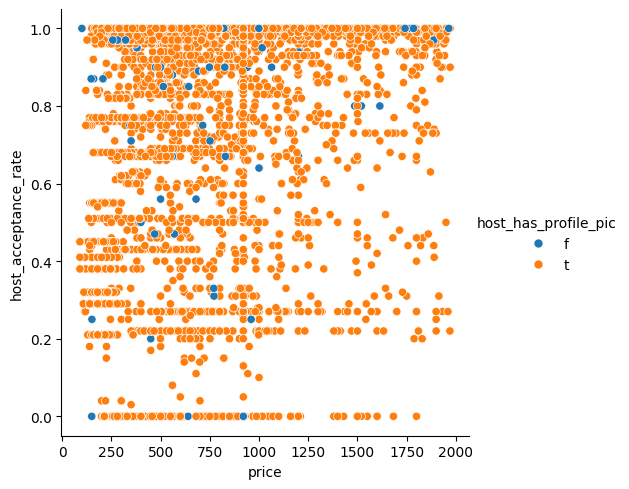

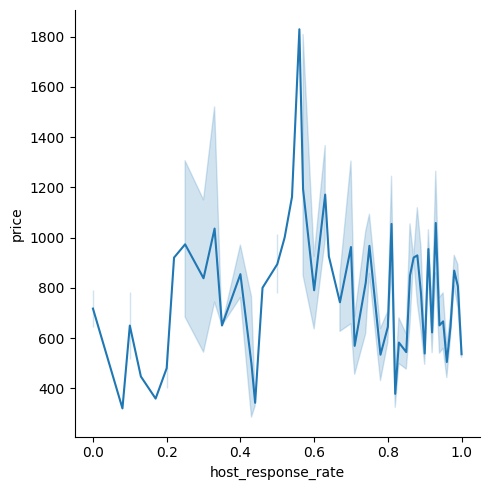

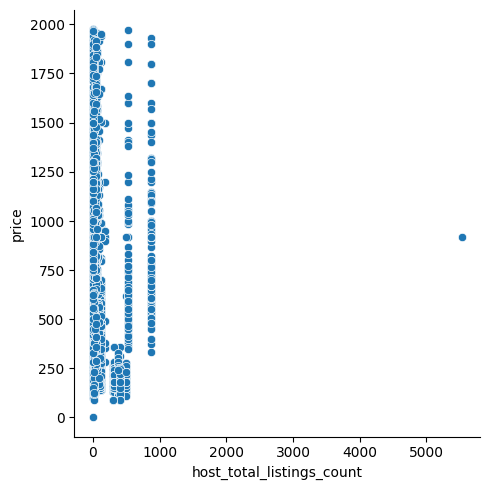

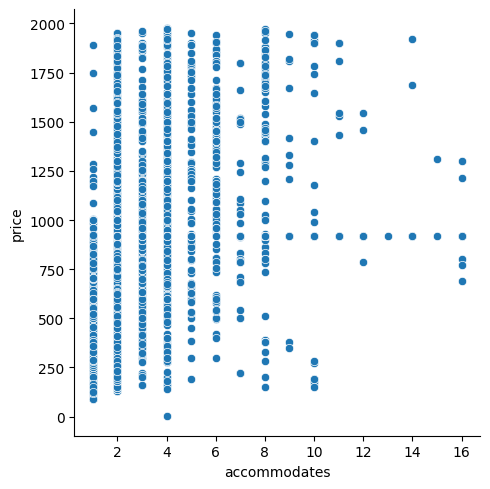

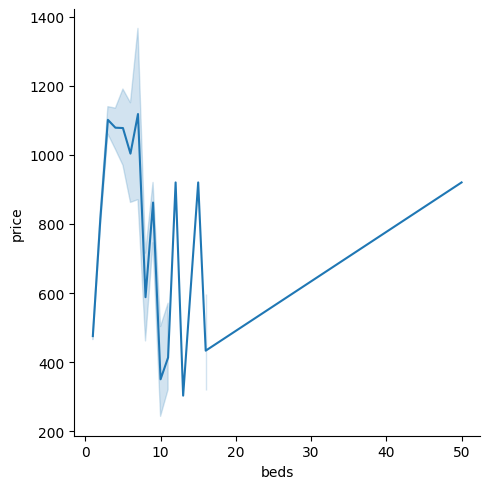

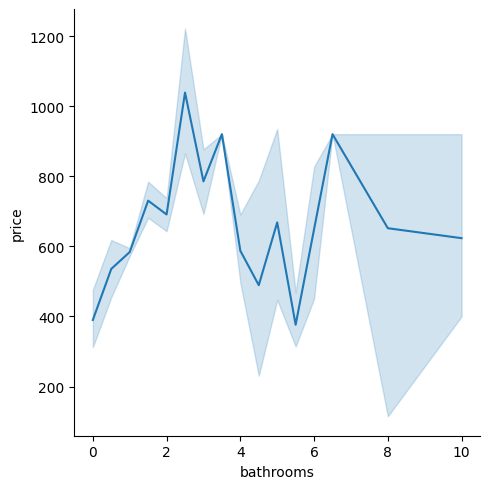

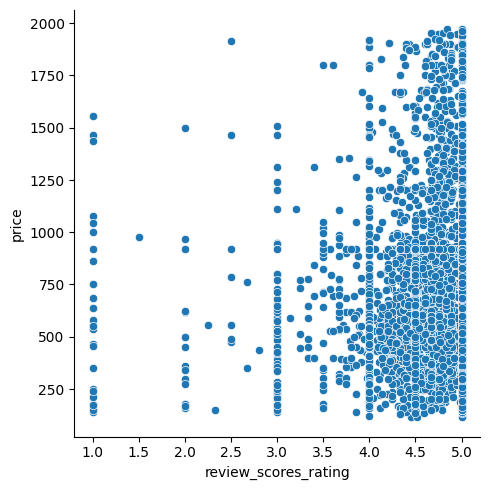

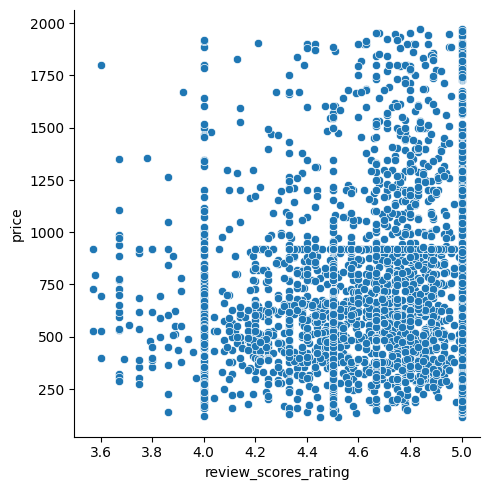

In [33]:
#Different plots to see the distribution of different variables in respect to price
sns.relplot(data=listings, x="price", y="host_acceptance_rate", hue='host_has_profile_pic')
print(sns.relplot(data=listings, x="host_response_rate", y="price", kind='line'))
print(sns.relplot(data=listings, x="host_total_listings_count", y="price"))
print(sns.relplot(data=listings, x="accommodates", y="price"))
print(sns.relplot(data=listings, x="beds", y="price", kind='line'))
print(sns.relplot(data=listings, x="bathrooms", y="price", kind='line'))
print(sns.relplot(data=listings, x="review_scores_rating", y="price"))
filter = listings[listings['review_scores_rating'] > 3.5]
print(sns.relplot(data=filter, x="review_scores_rating", y="price"))

##### Accomodates/Score Range and Price: A possible positive correlation between Accomodates and Price and Score Range and Price

Axes(0.125,0.11;0.775x0.77)


/var/folders/y5/yrmbbwsx3sg3l8fv0bd8kxm80000gn/T/ipykernel_74577/3588707773.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  print(sns.barplot(data=listings, x='accommodates', y='price', ci=None, color='skyblue'))


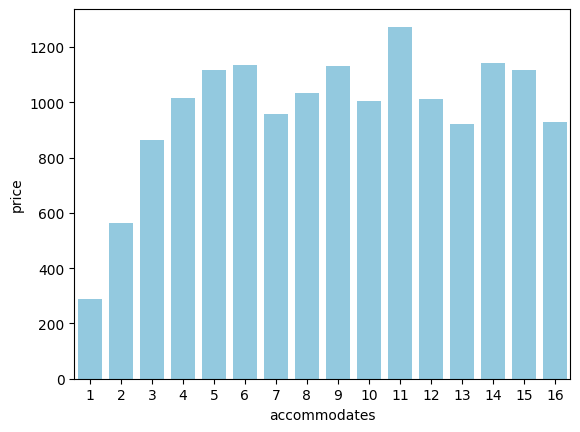

In [39]:
print(sns.barplot(data=listings, x='accommodates', y='price', ci=None, color='skyblue'))
#are there groups? 6 to 9 or maybe I can group them together and create ranges? 

In [34]:
#Create a new column for scores rating and accommodates - turn columns categorical 
scores_bins = [0, 1, 2, 3, 4, 5]
scores_labels = ['[0,1]', '[1,2]', '[2,3]','[3,4]','[4,5]']
listings['rating_range'] = pd.cut(listings['review_scores_rating'], bins=scores_bins, labels=scores_labels, right=True)

accom_bins = [0, 1, 2, 3, 4, 5]
accom_labels = ['[1,3]', '[3,6]', '[6,9]','[9,12]','[>12]']
listings['accomodate_range'] = pd.cut(listings['accommodates'], bins=accom_bins, labels=accom_labels, right=True)

In [ ]:
sns.barplot(data=listings, x='rating_range', y='price', errorbar=None, palette=airbnb_palette)
plt.title('Prices per Rating', fontweight='bold')
plt.xlabel('Rating', fontweight='bold',fontstyle = 'italic')
plt.ylabel('Price', fontweight='bold',fontstyle = 'italic')
plt.gca().set_facecolor('none') 

/var/folders/y5/yrmbbwsx3sg3l8fv0bd8kxm80000gn/T/ipykernel_74577/2943668604.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=listings, x='accomodate_range', y='price', ci=None, color=sns.xkcd_rgb['coral'])


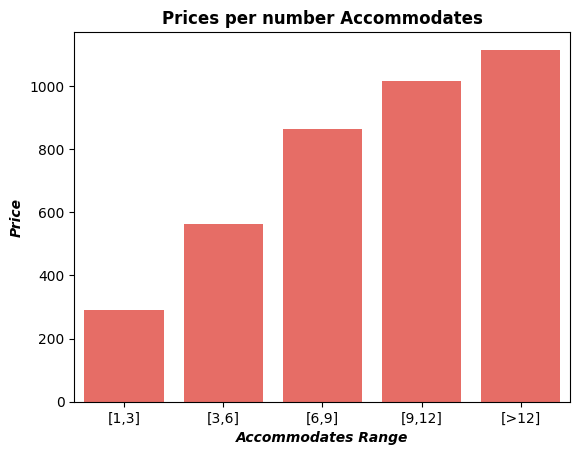

In [37]:
sns.barplot(data=listings, x='accomodate_range', y='price', errorbar=None, color=sns.xkcd_rgb['coral'])
plt.title('Prices per number Accommodates', fontweight='bold')
plt.xlabel('Accommodates Range', fontweight='bold',fontstyle = 'italic')
plt.ylabel('Price', fontweight='bold',fontstyle = 'italic')
plt.gca().set_facecolor('none') 
plt.savefig('prices_per_accommodates.png', bbox_inches='tight', dpi=300)

### Categorical variables

##### Plotting of different categorical variables in respect to price

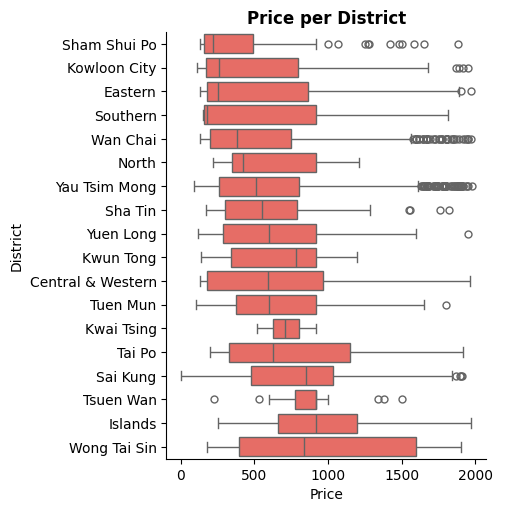

In [40]:
# Calculate mean price per neighborhood
mean_price_per_neighborhood = listings.groupby('neighbourhood')['price'].mean()

# Sort neighborhoods based on mean price
sorted_neighborhoods = mean_price_per_neighborhood.sort_values().index

# Plot the data using the sorted neighborhood order
sns.catplot(data=listings, x="price", y="neighbourhood", kind="box", color=sns.xkcd_rgb['coral'], order=sorted_neighborhoods)
plt.title('Price per District', fontweight='bold')
plt.xlabel('Price')
plt.ylabel('District')
plt.savefig('prices_per_district.png', bbox_inches='tight', dpi=300)


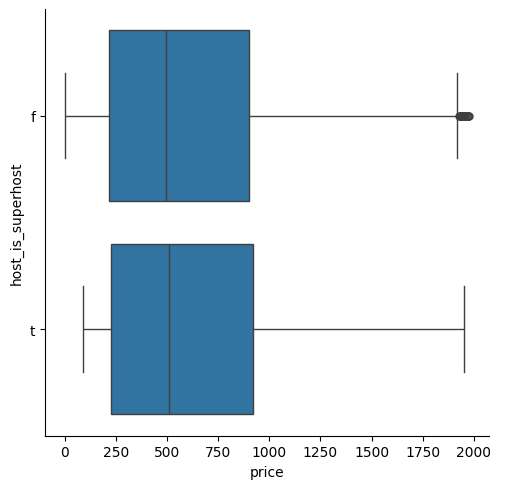

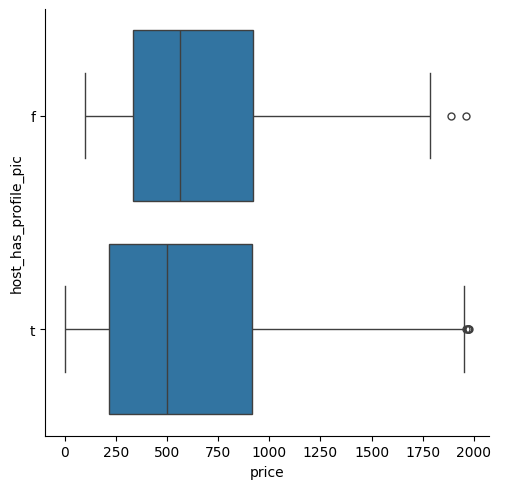

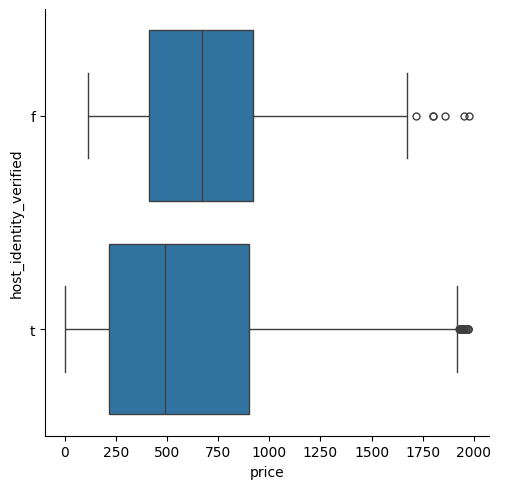

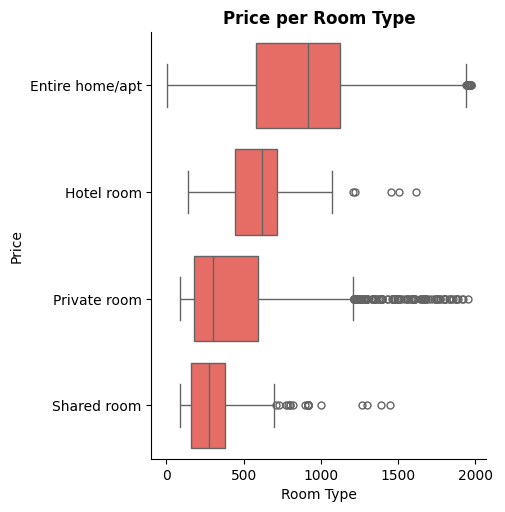

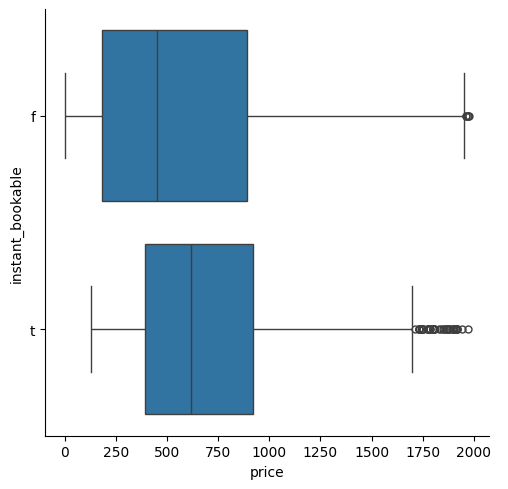

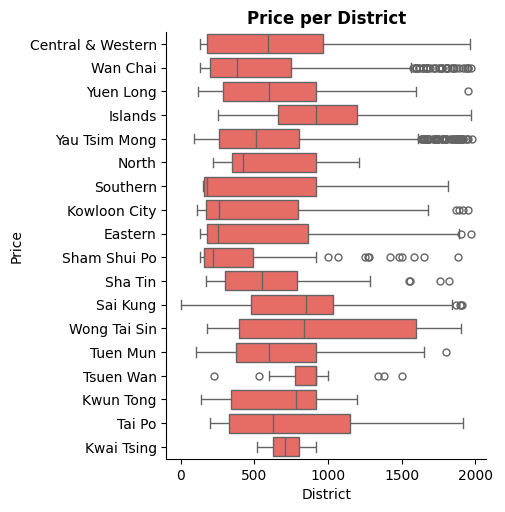

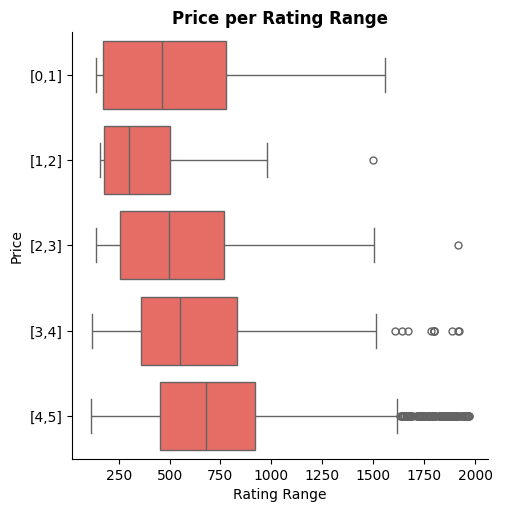

In [41]:
sns.catplot(data=listings, x="price", y="host_is_superhost", kind="box")
print(sns.catplot(data=listings, x="price", y="host_has_profile_pic", kind="box"))
print(sns.catplot(data=listings, x="price", y="host_identity_verified", kind="box"))
print(sns.catplot(data=listings, x="price", y="room_type", kind="box",color=sns.xkcd_rgb['coral']))
plt.title('Price per Room Type', fontweight='bold')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.savefig('prices_per_roomtype.png', bbox_inches='tight', dpi=300)
print(sns.catplot(data=listings, x="price", y="instant_bookable", kind="box"))
print(sns.catplot(data=listings, x="price", y="neighbourhood", kind="box",palette=airbnb_palette))
plt.title('Price per District', fontweight='bold')
plt.xlabel('District')
plt.ylabel('Price')
plt.savefig('prices_per_district.png', bbox_inches='tight', dpi=300)
print(sns.catplot(data=listings, x="price", y="rating_range", kind="box",color=sns.xkcd_rgb['coral']))
plt.title('Price per Rating Range', fontweight='bold')
plt.xlabel('Rating Range')
plt.ylabel('Price')
plt.savefig('prices_per_ratingrange.png', bbox_inches='tight', dpi=300)

### A/B Testing and ANOVAs

In [43]:
#We test for normality using Shapiro-Wilk test - It shows a p-value > 0.05. Can't reject the null hypothesis that the data is normally distributed.
shapiro(listings['price'])

/var/folders/y5/yrmbbwsx3sg3l8fv0bd8kxm80000gn/T/ipykernel_74577/2728494166.py:1: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7029.
  shapiro(listings['price'])


ShapiroResult(statistic=nan, pvalue=1.0)

In [44]:
#We use t-test to compare the means of the two groups
group_a  = listings.loc[listings['host_is_superhost'] == 't', 'price']
group_b = listings.loc[listings['host_is_superhost'] == 'f', 'price']
ttest_ind(group_a, group_b, nan_policy='omit')
#p-value < 0.05, Ho is rejected, statistically significant difference between groups

TtestResult(statistic=2.4720331322819176, pvalue=0.013459987343664416, df=6535.0)

In [45]:
group_a  = listings.loc[listings['host_has_profile_pic'] == 't', 'price']
group_b = listings.loc[listings['host_has_profile_pic'] == 'f', 'price']
ttest_ind(group_a, group_b, nan_policy='omit')
#p-value < 0.05, Ho is rejected, statistically significant difference between groups

TtestResult(statistic=-2.105203530054596, pvalue=0.035311575762779795, df=6550.0)

In [46]:
group_a  = listings.loc[listings['host_identity_verified'] == 't', 'price']
group_b = listings.loc[listings['host_identity_verified'] == 'f', 'price']
ttest_ind(group_a, group_b, nan_policy='omit')
#p-value < 0.05, Ho is rejected, statistically significant difference between the means of the groups

TtestResult(statistic=-6.017996049184985, pvalue=1.8612744503398888e-09, df=6550.0)

In [47]:
group_a  = listings.loc[listings['instant_bookable'] == 't', 'price']
group_b = listings.loc[listings['instant_bookable'] == 'f', 'price']
ttest_ind(group_a, group_b, nan_policy='omit')
#p-value < 0.05, Ho is rejected, statistically significant difference between the means of the groups

TtestResult(statistic=10.897386007833216, pvalue=2.03705744242026e-27, df=6550.0)

In [48]:
group_a  = listings.loc[listings['room_type'] == 'Entire home/apt', 'price']
group_a.dropna(inplace=True)
group_b = listings.loc[listings['room_type'] == 'Private room', 'price']
group_b.dropna(inplace=True)
group_c = listings.loc[listings['room_type'] == 'Shared room', 'price']
group_c.dropna(inplace=True)
group_d = listings.loc[listings['room_type'] == 'Hotel room', 'price']
group_d.dropna(inplace=True)
f_oneway(group_a, group_b, group_c, group_d)
#p-value < 0.05, Ho is rejected, statistically significant difference between the means of the groups

F_onewayResult(statistic=860.7363499410986, pvalue=0.0)

In [49]:
group_a  = listings.loc[listings['rating_range'] == '[1,2]', 'price']
group_a.dropna(inplace=True)
group_b = listings.loc[listings['rating_range'] == '[2,3]', 'price']
group_b.dropna(inplace=True)
group_c = listings.loc[listings['rating_range'] == '[3,4]', 'price']
group_c.dropna(inplace=True)
group_d = listings.loc[listings['rating_range'] == '[4,5]', 'price']
group_d.dropna(inplace=True)

f_oneway(group_a, group_b, group_c, group_d)
#p-value < 0.05, Ho is rejected, statistically significant difference between the means of the groups

F_onewayResult(statistic=23.535929015357418, pvalue=4.5890362900334114e-15)

## Genetare Map - Geojson

In [50]:
gdf = gp.read_file('/Users/alejandrovillanuevalledo/Documents/GitHub/Hong-Kong_project/CSV/neighbourhoods.geojson')

In [51]:
#To chech it matches with those in our listings dataframe
gdf['neighbourhood'].unique()

array(['North', 'Central & Western', 'Eastern', 'Sha Tin', 'Sham Shui Po',
       'Sai Kung', 'Yau Tsim Mong', 'Tsuen Wan', 'Kwai Tsing', 'Southern',
       'Yuen Long', 'Wan Chai', 'Tai Po', 'Kowloon City', 'Islands',
       'Tuen Mun', 'Kwun Tong', 'Wong Tai Sin'], dtype=object)

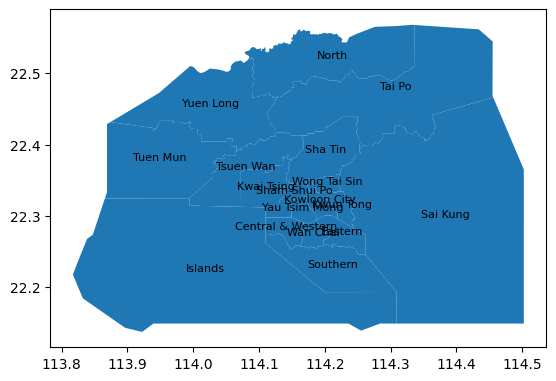

<Figure size 5000x5000 with 0 Axes>

In [52]:
# Plot the GeoDataFrame
ax = gdf.plot()

# Add labels to the plot
plt.figure(figsize=(50, 50))
for idx, row in gdf.iterrows():
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, row['neighbourhood'], fontsize=8, ha='center')
plt.show()

In [74]:

# We improve the map to see it as a heatmap for average prices per neighbourhood and save it as HTML to use later in a streamlit app 
feq = listings.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)

hk = gp.read_file("/Users/alejandrovillanuevalledo/Documents/GitHub/Hong-Kong_project/CSV/neighbourhoods.geojson")
feq = pd.DataFrame([feq])
feq = feq.transpose()
hk = pd.merge(hk, feq, on='neighbourhood', how='left')
hk.rename(columns={'price': 'average_price'}, inplace=True)
hk.average_price = hk.average_price.round(decimals=0)

map_dict = hk.set_index('neighbourhood')['average_price'].to_dict()
color_scale = folium.LinearColormap(['yellow','red'], vmin = min(map_dict.values()), vmax = max(map_dict.values()))

def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood'])
    return color_scale(value)

map3 = folium.Map(location=[22.3193, 114.1694], zoom_start=11)
folium.GeoJson(data=hk,
               name='Hong Kong',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'average_price'], aliases=['Neighbourhood', 'Average Price'],
                                                      labels=True,
                                                      sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.5,
                   'border-radius': '10px'
                   },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map3)

map3.save('map3.html')

## Final Data Frame for further analysis in PowerBI

In [54]:
#We get rid of the final variables that we don't need
filtered_listings = listings[(listings['host_acceptance_rate'].isnull()) &
                             (listings['host_response_rate'].isnull()) &
                             (listings['review_scores_rating'].isnull()) &
                             (listings['availability_90'] == 0) &
                             (listings['availability_60'] == 0) &
                             (listings['availability_30']== 0)]

listings = listings.drop(filtered_listings.index)

In [56]:
#After careful study, we see that those rows where price and has_availability are null, belong to listings that are no longer active
listings = listings.dropna(subset=['price', 'has_availability',], how='all')

In [57]:
final_listings = listings[['host_id','host_name','price','host_acceptance_rate', 'host_response_rate', 'host_is_superhost', 'host_has_profile_pic',
                          'host_identity_verified', 'instant_bookable','host_total_listings_count', 'accommodates', 'bathrooms','beds',
                          'review_scores_rating','room_type','neighbourhood','rating_range', 'accomodate_range']]

In [58]:
final_listings.isna().sum()

host_id                         0
host_name                       0
price                           0
host_acceptance_rate          266
host_response_rate            356
host_is_superhost              15
host_has_profile_pic            0
host_identity_verified          0
instant_bookable                0
host_total_listings_count       0
accommodates                    0
bathrooms                      17
beds                          108
review_scores_rating         3185
room_type                       0
neighbourhood                   0
rating_range                 3185
accomodate_range              543
dtype: int64

In [59]:
final_listings.to_csv('/Users/alejandrovillanuevalledo/Documents/GitHub/Hong-Kong_project/CSV/final_listings.csv', index=False)

In [60]:
final_listings.info() #listings 6430 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6430 entries, 1 to 7028
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   host_id                    6430 non-null   int64   
 1   host_name                  6430 non-null   object  
 2   price                      6430 non-null   float64 
 3   host_acceptance_rate       6164 non-null   float64 
 4   host_response_rate         6074 non-null   float64 
 5   host_is_superhost          6415 non-null   category
 6   host_has_profile_pic       6430 non-null   category
 7   host_identity_verified     6430 non-null   category
 8   instant_bookable           6430 non-null   category
 9   host_total_listings_count  6430 non-null   int64   
 10  accommodates               6430 non-null   int64   
 11  bathrooms                  6413 non-null   float64 
 12  beds                       6322 non-null   float64 
 13  review_scores_rating       3245 n

In [61]:
final_listings['host_id'].nunique()

1485

In [88]:
final_listings.groupby('host_id')['host_total_listings_count'].first().sum()

17642

In [62]:
# Group by 'hostid' and count the number of listings for each host ID
listings_per_host = final_listings.groupby('host_id')['host_name'].size()


In [63]:
# Group by 'host_id' and calculate the size and first value for each group
listings_per_host = final_listings.groupby('host_id').agg(listing_count=('host_name', 'size'), host_name=('host_name', 'first'))


# Display the resulting DataFrame
print(listings_per_host)


           listing_count  host_name
host_id                            
63038                  1     Mikkel
83267                  1      Vikas
116400                 1  Elizabeth
168410                 2     Edmond
298638                 1    Vincent
...                  ...        ...
548523187              1   Ghislain
549085243              3         煥民
550166292              1       Jaja
550655332              1   Chrissie
551037053              1     Samuel

[1485 rows x 2 columns]


In [64]:
listings_per_host.reset_index(drop=True, inplace=True)

In [65]:
grouped = final_listings.groupby('host_id').agg({'host_name': 'first', 'host_total_listings_count': 'first'}).reset_index()



In [66]:
grouped.drop(columns='host_id', inplace=True)

/var/folders/y5/yrmbbwsx3sg3l8fv0bd8kxm80000gn/T/ipykernel_74577/1429157664.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(final_listings, x='neighbourhood', order=final_listings['neighbourhood'].value_counts().index, palette='viridis')


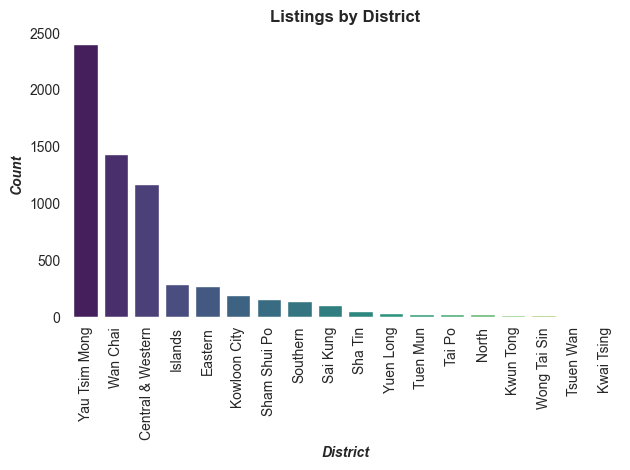

In [67]:
sns.set_style("dark", {"axes.facecolor": "none"})
sns.countplot(final_listings, x='neighbourhood', order=final_listings['neighbourhood'].value_counts().index, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('District', fontstyle='italic',fontweight='bold')
plt.ylabel('Count', fontstyle='italic',fontweight='bold')
plt.title('Listings by District', fontweight='bold')
plt.tight_layout()
plt.savefig('listings_by_district.png', bbox_inches='tight', dpi=300)



In [68]:
#average price per district 
mean_prices = final_listings.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

/var/folders/y5/yrmbbwsx3sg3l8fv0bd8kxm80000gn/T/ipykernel_74577/1359219411.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=mean_prices.values, y=mean_prices.index, palette='viridis')


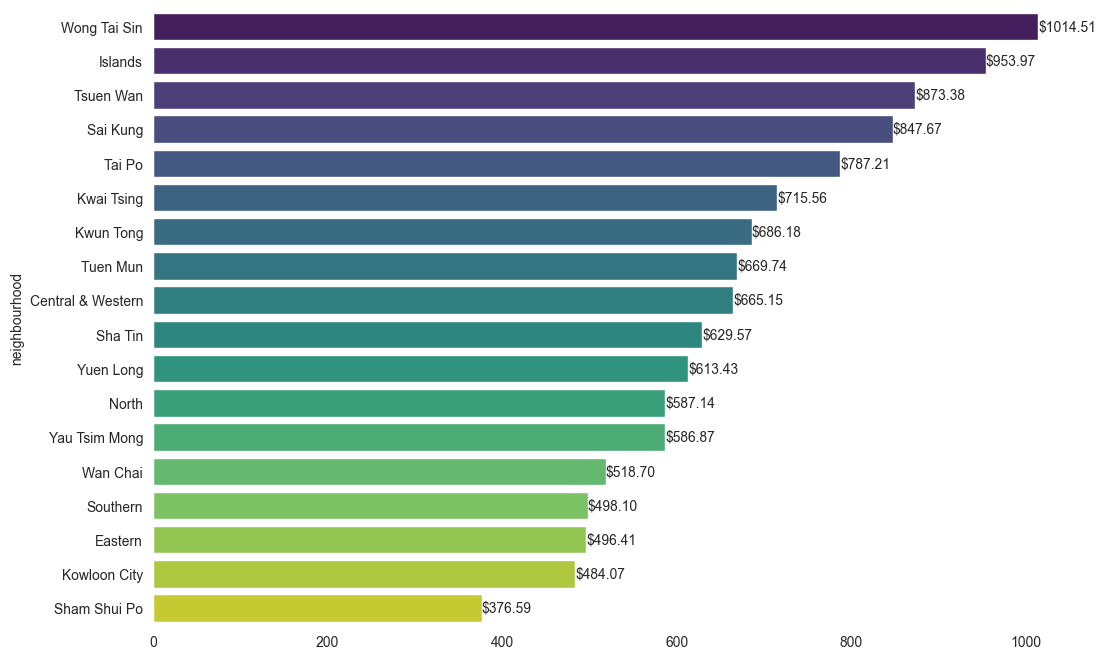

In [90]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=mean_prices.values, y=mean_prices.index, palette='viridis')
for i, (mean_price, neighbourhood) in enumerate(zip(mean_prices.values, mean_prices.index)):
    ax.text(mean_price, i, f'${mean_price:.2f}', va='center')
plt.savefig('price_by_district.png', bbox_inches='tight', dpi=600)

<Axes: >

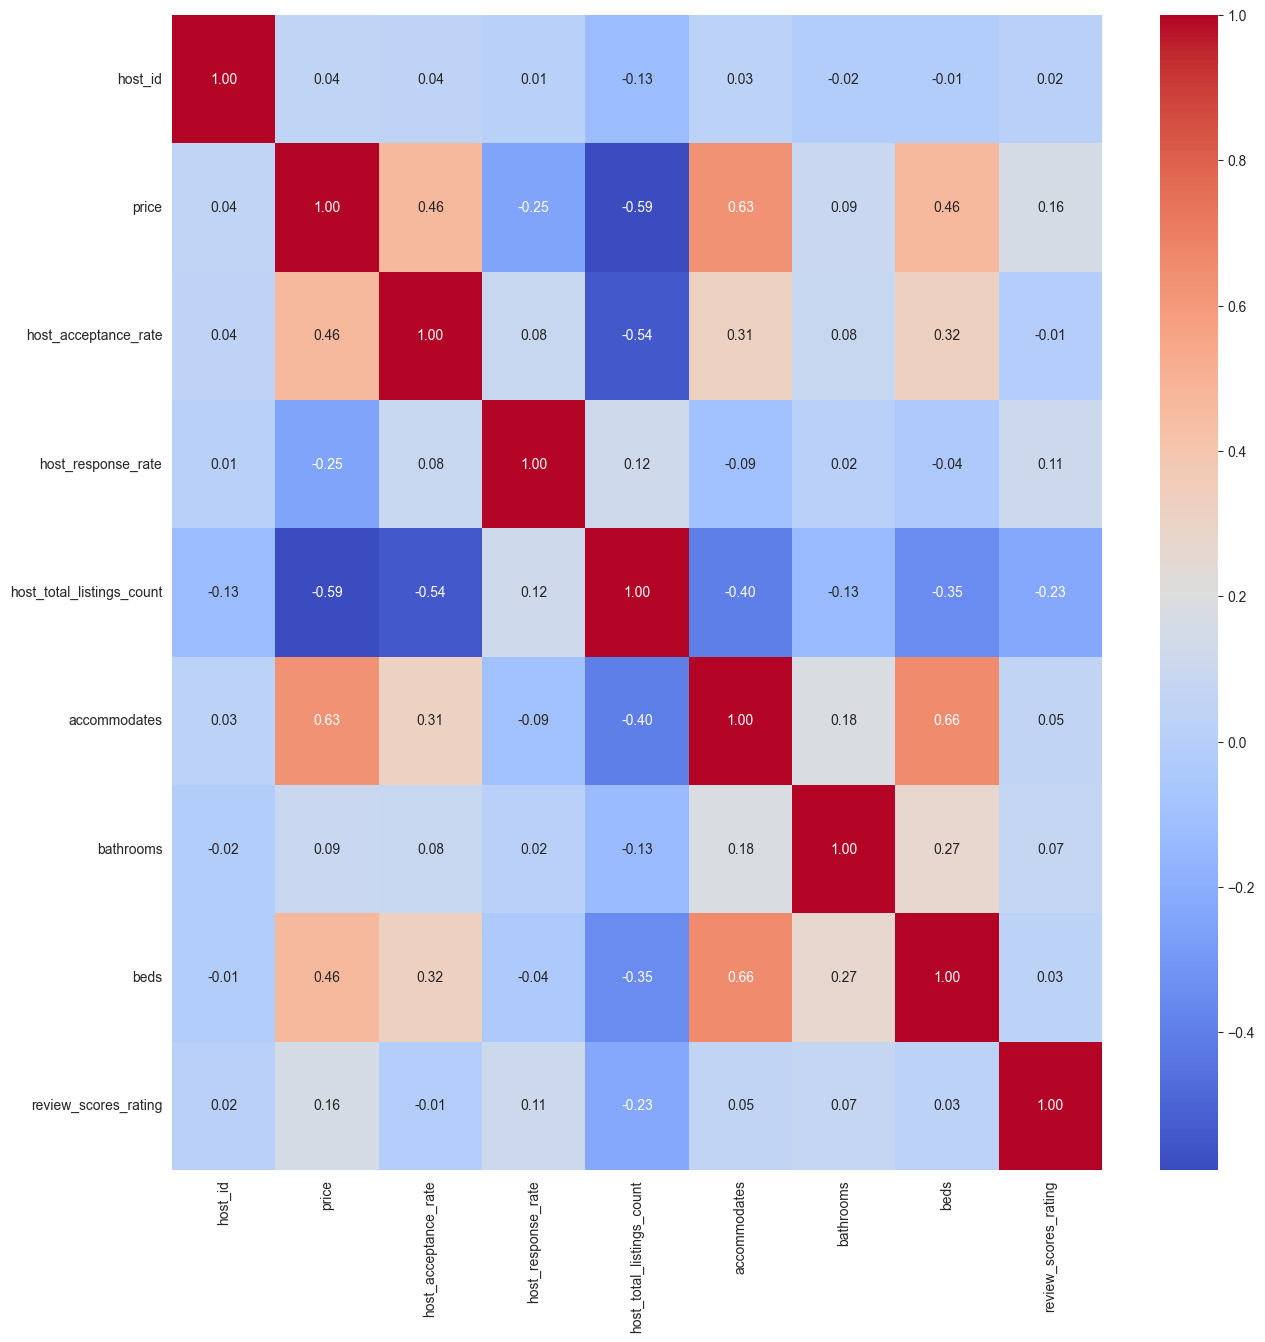

In [70]:
num_columns = final_listings.select_dtypes(include=['number'])
num_columns.corr('spearman')
plt.figure(figsize=(15, 15))
sns.heatmap(num_columns.corr('spearman'), annot=True, cmap='coolwarm', fmt=".2f")